# Assignment #4.
I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name:Priestley Fernandes

CWID:20008622

Date:26/11/2022

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks.

For all the programming homeworks, you should submit a report as a Jupyter notebook organized by questions, with the proper explanation for every answer, and saved as 1). an HTML or pdf file. It might be easier to generate an HTML file than a pdf file. 2). Notebook file with the extension .ipynb. From the file menu of the Jupyter notebook, you can download the PDF or HTML and ipynb files as: File --> Download as:

If you want to improve your homework, you can resubmit it until the deadline.

Total = 20 points

## Question
You are a volatility trader and would like to classify the VIX index of future volatility (http://www.cboe.com/vix) in periods of low, middle, and high volatility.
As you have access to the historical VIX values (file ^Vix.csv), train a Hidden Markov Model (HMM) to obtain three states of the economy (high, medium, and low volatility).  You can use the GaussianHMM function from the hmmlearn (hmmlearn.hmm) Python package.
Instructions to install the package hmmlearn:
-	Open an Anaconda terminal selecting “Run as Administrator” 
-	Submit the following code in this terminal:
conda install -c conda-forge hmmlearn
You can also explore the package and other ways to install this package at:
https://github.com/hmmlearn/hmmlearn

You can also explore the tutorial of hmmlearn and examples at:
https://hmmlearn.readthedocs.io/en/latest/tutorial.html


1).	With the complete dataset, create the variable Xp that includes the following periods (you will not use Xp for your model):

0.	Low volatility: observations less or equal than the 15% percentile.
1.	Medium volatility
2.	High volatility: observations greater or equal than the 85% percentile.  (1 point)

In [255]:
!pip install --upgrade --user hmmlearn
import pandas as pd

In [256]:
#Loading the data
df = pd.read_csv('^VIX-2.csv')
print(df.head())

#Finding the mean and median for Close
print(df.Close.mean()) 
print(df.Close.median())

#Finding the 15th, 50th and 85th percentile
per_15 = df.Close.quantile(0.15)
print('15th percentile is: ',per_15)
per_50 = df.Close.quantile(0.5)
print('50th percentile is: ',per_50)
per_85 = df.Close.quantile(0.85)
print('85th percentile is: ',per_85)

#Creating the variable XP
df['XP'] = df.Close.apply(lambda x: 0 if x<=per_15 else 2 if x>= per_85 else 1)

#Printing the occurence of all states
print('Percentile less than 15: ',sum(df["XP"]==0))
print('Percentile between 15 and 85: ',sum(df["XP"]==1))
print('Percentile greater than 85: ',sum(df["XP"]==2))

         date   Open   High    Low  Close
0  2003-01-02  28.74  28.74  25.32  25.39
1  2003-01-03  25.55  25.55  24.68  24.68
2  2003-01-06  25.32  25.42  24.29  24.91
3  2003-01-07  25.13  25.69  24.91  25.13
4  2003-01-08  25.62  25.76  25.07  25.53
18.837527272727282
16.095
15th percentile is:  12.24
50th percentile is:  16.095
85th percentile is:  25.23
Percentile less than 15:  664
Percentile between 15 and 85:  3075
Percentile greater than 85:  661


2. Train your HMM only using the VIX index from 2003 until 2010. Obtain the hidden states for your test sample using the data from 2011 to 2020 (without including Xp)   (6 points)

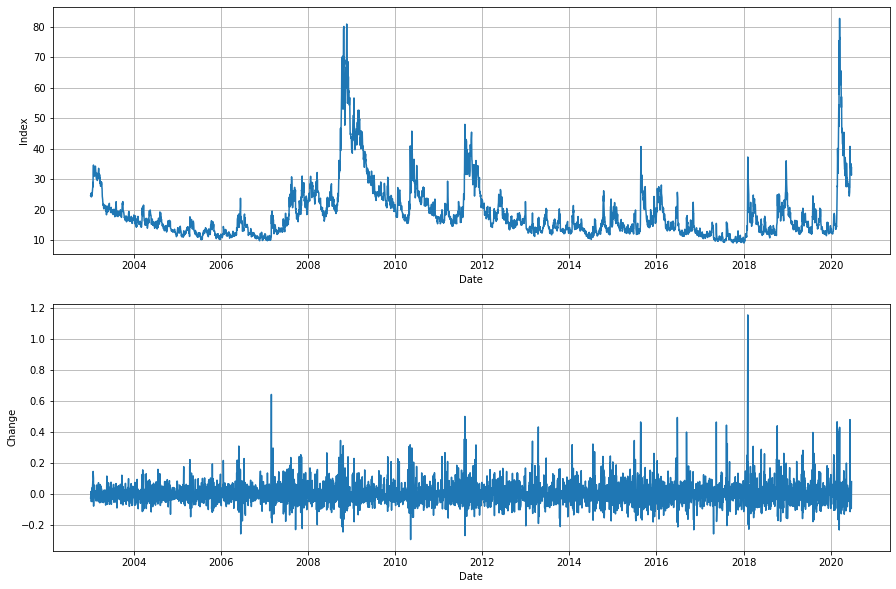

In [257]:
import matplotlib.pyplot as plt

# Convert the datetime from str to datetime object.
df["date"] = pd.to_datetime(df["date"])

# Determine the daily change in VIX(just for plots)
df["return"] = df["Close"].pct_change()

#Sorting by date
df = df.sort_values('date')

#Dropping the null values
df = df.dropna()

#Creating the train data
df_train = df[df['date']<='2010-12-31']

#Creating the test data
df_test = df[df['date']>'2010-12-31']

# Plot the returns and vix index
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(df["date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Index")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(df["date"], df["return"])
plt.xlabel("Date")
plt.ylabel("Change")
plt.grid(True)
plt.show()


In [258]:
from hmmlearn import hmm
import numpy as np

# Use the Closing price to define X test and X train 

X_train = df_train[["Close"]].values
X_test = df_test[["Close"]].values

models =list()
scores = list()

#Using loop to find best model using score 
for i in range(1000):
        # define our hidden Markov model
   # Build the HMM model 
    model = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 10_000, random_state = i)
    # Fitting the model
    model.fit(X_train)

    models.append(model)
    scores.append(model.score(X_train))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

print(models)
# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)}')

## Build the HMM model 
#model = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 10_000, random_state = 1000)
#
## Fitting the model
#model.fit(X_train)


# Predict the hidden states corresponding to observed X and creating a new column
predicted_states = model.predict(X_test)

df_test["Predicted States"] = predicted_states

#Printing occurences of states
print('Predicted 0 state: ', sum(df_test["Predicted States"]==0))
print('Predicted 1 state: ',sum(df_test["Predicted States"]==1))
print('Predicted 2 state: ',sum(df_test["Predicted States"]==2))

#Printing the unique states
states = pd.unique(predicted_states)
print('Unique states are: ',states)

#Printing the start probabilities
print('Start probabilities: ',list(model.startprob_))


Converged: True	Score: -6173.27015792393
Converged: True	Score: -6173.30270562225
Converged: True	Score: -5296.03847957733
Converged: True	Score: -5296.039672863189
Converged: True	Score: -5296.037708066042
Converged: True	Score: -5296.038989909607
Converged: True	Score: -5296.037954755937
Converged: True	Score: -5296.037779496789
Converged: True	Score: -6173.378625106517
Converged: True	Score: -5296.038543790145
Converged: True	Score: -5296.038492526163
Converged: True	Score: -6173.358037085998
Converged: True	Score: -5296.0383325180965
Converged: True	Score: -5296.039505011385
Converged: True	Score: -6173.378226504562
Converged: True	Score: -5296.038912398823
Converged: True	Score: -5331.904306252529
Converged: True	Score: -5296.039448011567
Converged: True	Score: -6173.352430145502
Converged: True	Score: -5296.038179189934
Converged: True	Score: -6173.251293215875
Converged: True	Score: -5296.037811434965
Converged: True	Score: -5296.038211833765
Converged: True	Score: -5296.0379727

Converged: True	Score: -5296.037656116315
Converged: True	Score: -5296.037751233096
Converged: True	Score: -5296.039257074096
Converged: True	Score: -5307.629915133515
Converged: True	Score: -5296.038008835304
Converged: True	Score: -5296.038789093429
Converged: True	Score: -6173.349461033723
Converged: True	Score: -5296.037700756252
Converged: True	Score: -5296.03849671618
Converged: True	Score: -6173.3189006558
Converged: True	Score: -6173.362006185261
Converged: True	Score: -6173.372052476734
Converged: True	Score: -6173.380798094061
Converged: True	Score: -5296.037672221549
Converged: True	Score: -5296.03827518818
Converged: True	Score: -6173.251668027104
Converged: True	Score: -5296.038147717385
Converged: True	Score: -5296.03953080893
Converged: True	Score: -5296.038605351058
Converged: True	Score: -5296.0392955560565
Converged: True	Score: -5296.039076417922
Converged: True	Score: -5296.038679566172
Converged: True	Score: -6173.376282748739
Converged: True	Score: -6173.383683534

Converged: True	Score: -5296.039090869542
Converged: True	Score: -5296.037602749659
Converged: True	Score: -5296.038757041671
Converged: True	Score: -6173.267232307912
Converged: True	Score: -5296.037641011849
Converged: True	Score: -5296.038825248844
Converged: True	Score: -5296.038513900079
Converged: True	Score: -5296.037700642266
Converged: True	Score: -5296.0395886471615
Converged: True	Score: -5296.038798531765
Converged: True	Score: -5296.037678920643
Converged: True	Score: -5296.038135190202
Converged: True	Score: -5296.039504704205
Converged: True	Score: -6173.365743189689
Converged: True	Score: -6173.311187468762
Converged: True	Score: -5296.037717432181
Converged: True	Score: -5296.037782165888
Converged: True	Score: -6173.365295659367
Converged: True	Score: -5296.038521162251
Converged: True	Score: -5296.038639841727
Converged: True	Score: -5296.03929620903
Converged: True	Score: -5296.038277744381
Converged: True	Score: -6173.304815635454
Converged: True	Score: -5307.62604

Converged: True	Score: -5296.039444787466
Converged: True	Score: -6173.362357283216
Converged: True	Score: -6172.976325445111
Converged: True	Score: -6173.37651061609
Converged: True	Score: -5296.037623236655
Converged: True	Score: -5296.037690264048
Converged: True	Score: -5296.038855573254
Converged: True	Score: -6173.2669792839615
Converged: True	Score: -6173.380507727753
Converged: True	Score: -5296.038921362979
Converged: True	Score: -6173.376523913328
Converged: True	Score: -6173.28490803401
Converged: True	Score: -5296.038611580054
Converged: True	Score: -5296.0391827283665
Converged: True	Score: -5296.0397538795205
Converged: True	Score: -5296.0377463539135
Converged: True	Score: -5296.037931570116
Converged: True	Score: -6173.304438287588
Converged: True	Score: -5296.038253582861
Converged: True	Score: -5296.036701821848
Converged: True	Score: -5296.037920439224
Converged: True	Score: -5296.038462388391
Converged: True	Score: -5296.038951232611
Converged: True	Score: -5296.039

Converged: True	Score: -5331.90456926541
Converged: True	Score: -5331.904145321617
Converged: True	Score: -5296.038001125299
Converged: True	Score: -5296.037908216104
Converged: True	Score: -5296.039323009916
Converged: True	Score: -5296.038908405579
Converged: True	Score: -6173.371487545432
Converged: True	Score: -6173.361389359814
Converged: True	Score: -6173.294087572636
Converged: True	Score: -5296.038945461254
Converged: True	Score: -6173.380852155916
Converged: True	Score: -5296.036316135711
Converged: True	Score: -5296.0390522059515
Converged: True	Score: -5296.03928242592
Converged: True	Score: -5296.038137797238
Converged: True	Score: -5296.039454491307
Converged: True	Score: -5296.039311026588
Converged: True	Score: -5296.037642615698
Converged: True	Score: -5296.038198799016
Converged: True	Score: -5296.038938331444
Converged: True	Score: -5331.903805607582
Converged: True	Score: -6173.373783273445
Converged: True	Score: -5296.039189865039
Converged: True	Score: -6173.377342

Converged: True	Score: -5296.039051459572
Converged: True	Score: -6172.6003799835635
Converged: True	Score: -5296.039476785458
Converged: True	Score: -5296.037709585808
Converged: True	Score: -5296.038891294939
Converged: True	Score: -5296.037719700576
Converged: True	Score: -5296.038104132805
Converged: True	Score: -5296.038474013266
Converged: True	Score: -6173.374736957211
Converged: True	Score: -5296.037953363415
Converged: True	Score: -5296.03900324873
Converged: True	Score: -5296.038041270691
Converged: True	Score: -6173.367283383613
Converged: True	Score: -6173.2909534680075
Converged: True	Score: -6173.3693661240395
Converged: True	Score: -5296.039556574037
Converged: True	Score: -6173.317142751197
Converged: True	Score: -6173.358631159971
[GaussianHMM(covariance_type='full', n_components=3, n_iter=10000,
            random_state=0), GaussianHMM(covariance_type='full', n_components=3, n_iter=10000,
            random_state=1), GaussianHMM(covariance_type='full', n_components=3,

/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_38037/2490499176.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Predicted States"] = predicted_states


2.a). Calculate the mean and variance of each state   (1 point)

In [259]:
#Printing the means of all states

print('The means of each state are as follows:')
print(model.means_)


#Printing the variances of all states

print('The variance of each state are as follows:')
print(model.covars_)



# State 1 -- 22.315, State 2 -- 41.47 , State 0-- 13.75
#Hihest mean for state 2
#Second highest for state 1
#Third highest for state 0


The means of each state are as follows:
[[13.74747081]
 [22.29998032]
 [41.38835471]]
The variance of each state are as follows:
[[[  4.67210242]]

 [[ 10.3040126 ]]

 [[146.06047497]]]


2.b). Calculate the transition matrix. Indicate what is the probability to transicion from a state of low volatility to medium volatility.   (1 point)

In [260]:
#Printing the transaction matrix
print('The transition matrix is as follows: ')
print(model.transmat_)



The transition matrix is as follows: 
[[9.92835196e-01 7.16480440e-03 1.18955829e-41]
 [9.72126585e-03 9.84932281e-01 5.34645339e-03]
 [1.55853007e-34 1.52469589e-02 9.84753041e-01]]


# The probability of transition from low to medium volatility is indicated as 7.2e-003.

2.c).Create a  new variable hidden_states where you assign 2 to the hidden state with the highest mean, 1 the hidden state with the second highest mean, and 0 otherwise.   (1 point)

In [264]:
#Creating a new variable hidden state to assign the values of hdden states as indicated 
df_test['hidden_states'] = df_test['Predicted States'].apply(lambda x: 2 if x == 2 else 1 if x == 1 else 0 )

#Printing the occurence frequency of hidden states
print('Hidden state 0 occurence: ',sum(df_test["hidden_states"]==0))
print('Hidden state 1 occurence: ',sum(df_test["hidden_states"]==1))
print('Hidden state 2 occurence: ',sum(df_test["hidden_states"]==2))

Hidden state 0 occurence:  1659
Hidden state 1 occurence:  562
Hidden state 2 occurence:  164


/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_38037/4079533209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['hidden_states'] = df_test['Predicted States'].apply(lambda x: 2 if x == 2 else 1 if x == 1 else 0 )


In [265]:
# Using the test model 

# Use the daily change 
X_train = df_train[["Close"]].values

# Predict the hidden states corresponding to observed X and creating a new column
predicted_states = model.predict(X_train)
df_train["Predicted States"] = predicted_states

#Printing the unique states
states = pd.unique(predicted_states)
print(states)

#Printing the start probabilities
list(model.startprob_)
df_train

#Creating a new variable hidden state to assign the values of hdden states as indicated 
df_train['hidden_states'] = df_train['Predicted States'].apply(lambda x: 2 if x == 2 else 1 if x == 1 else 0 )
df_train

[1 2 0]


/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_38037/1882649002.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Predicted States"] = predicted_states
/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_38037/1882649002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hidden_states'] = df_train['Predicted States'].apply(lambda x: 2 if x == 2 else 1 if x == 1 else 0 )


,date,Open,High,Low,Close,XP,return,Predicted States,hidden_states
1,2003-01-03,25.55,25.55,24.68,24.68,1,-0.027964,1,1
2,2003-01-06,25.32,25.42,24.29,24.91,1,0.009319,1,1
3,2003-01-07,25.13,25.69,24.91,25.13,1,0.008832,1,1
4,2003-01-08,25.62,25.76,25.07,25.53,2,0.015917,1,1
5,2003-01-09,24.90,24.90,24.02,24.25,1,-0.050137,1,1
...,...,...,...,...,...,...,...,...,...
2010,2010-12-27,18.26,18.32,17.66,17.67,1,0.072860,0,0
2011,2010-12-28,17.30,17.99,17.30,17.52,1,-0.008489,0,0
2012,2010-12-29,17.49,17.49,17.02,17.28,1,-0.013699,0,0
2013,2010-12-30,17.65,17.89,17.46,17.52,1,0.013889,0,0


2.d). Calculate the frequency table or confusion matrix comparing your hidden states with the variable Xp.   (1 point)

In [266]:
#Calculating the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('The confusion matrix is as follows:')
print(confusion_matrix(df_test['XP'], df_test['hidden_states']))

print('The classification report is as observed:')
print(classification_report(df_test['XP'], df_test['hidden_states'], digits=3))

The confusion matrix is as follows:
[[ 376    0    0]
 [1283  501    1]
 [   0   61  163]]
The classification report is as observed:
              precision    recall  f1-score   support

           0      0.227     1.000     0.370       376
           1      0.891     0.281     0.427      1785
           2      0.994     0.728     0.840       224

    accuracy                          0.436      2385
   macro avg      0.704     0.669     0.546      2385
weighted avg      0.796     0.436     0.457      2385



2.e). Calculate accuracy and the Matthews correlation coefficient (sklearn.metrics.matthews_corrcoef) comparing the hidden states with Xp. Discuss your results   (2 points)

In [267]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

#Calculating accuaracy
acc_score = accuracy_score(df_test['XP'], df_test['hidden_states'])
print('Accuarcy score is as follow: ',acc_score)

#Calculating matthews correaltion coefficient 
mat_coeff = matthews_corrcoef(df_test['XP'], df_test['hidden_states'])
print('Matthews correaltion co-efficient is as follows: ',mat_coeff)

Accuarcy score is as follow:  0.4360587002096436
Matthews correaltion co-efficient is as follows:  0.3336579157297111


# 

# Here, the accuracy can be found out to be 0.4360587002096436. The model is not able to predict many values. But different random states are giving differnet values since local optimas while convergence are different for different start probabilies and initializations and different random states can lead to different results.
# The Matthews correlation coefficient (MCC)is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset. But as per the classification report obtained above, we can observe that prescision and recall for states 0 and 1 are not very promising and there are errors in predicting values. The correlation co-efficient is low around 0.33365.

2.f). Plot VIX for the entire period of analysis and the period from 2011 to 2020. You can use pyplot from the Python matplotlib to generate your graphs. (4 points)

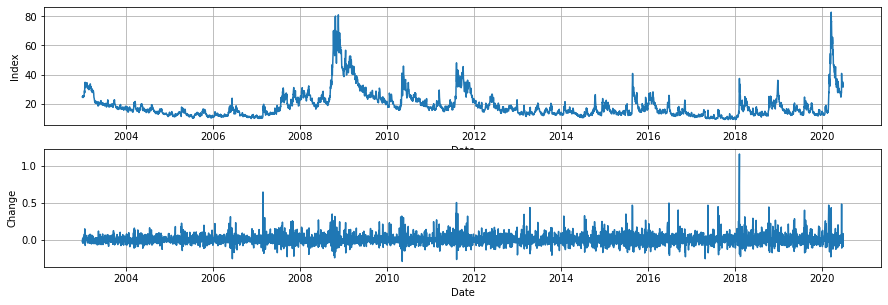

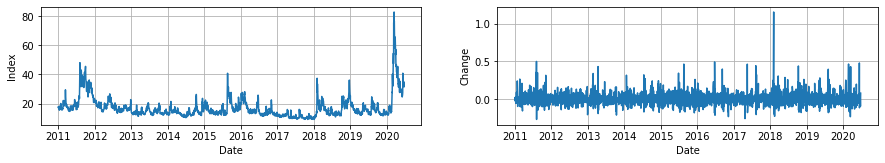

In [268]:
# Plot the returns and vix index
plt.figure(figsize = (15, 10))
plt.subplot(4,1,1)
plt.plot(df["date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Index")
plt.grid(True)
plt.subplot(4,1,2)
plt.plot(df["date"], df["return"])
plt.xlabel("Date")
plt.ylabel("Change")
plt.grid(True)
plt.show()


# Plot the returns and vix index
plt.figure(figsize = (15, 10))
plt.subplot(4,2,1)
plt.plot(df_test["date"], df_test["Close"])
plt.xlabel("Date")
plt.ylabel("Index")
plt.grid(True)
plt.subplot(4,2,2)
plt.plot(df_test["date"], df_test["return"])
plt.xlabel("Date")
plt.ylabel("Change")
plt.grid(True)
plt.show()


3). Discuss the results obtained in the previous question, and review if the periods of high or low volatility detected by your HMM explain any significant changes of the economy (i.e., credit crisis, COVID crisis …) (3 points)

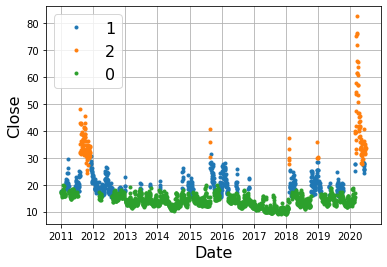

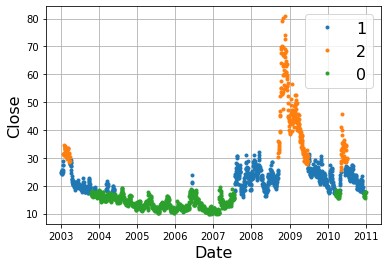

In [269]:
#Plotting a graph to explain the observbation as per states attained
for i in states:
   
    x = df_test["date"][df_test['hidden_states'] == i]

    y = df_test["Close"][df_test['hidden_states'] == i]

    plt.plot(x, y, '.')

plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close", fontsize=16)
plt.show()   


#Plotting a graph to explain the observbation as per states attained
for i in states:
   
    x = df_train["date"][df_train['hidden_states'] == i]

    y = df_train["Close"][df_train['hidden_states'] == i]
    
    plt.plot(x, y, '.')

plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close", fontsize=16)
plt.show()   



# From the graphs obtained in Q 2f), it can be observed that the closing values of volatality index was very high in the year 2009 and 2020. For a majority of time frame between 2003 and 2020, it could be observed that the volatility was low. As per the results there is no clear bifurcation to the lows and highs in volatilty. But the naked can suspect some distinction. 
# HMM model is able to define hidden states clearly, which can be seen from the graphs created as part of Q3. It can be easily observed that, points marked in orange suggest very high volatilities(mean 41.38 for train) . Also such states are rare occurences but they do continue for few months. Similarly, the points marked in blue indicate moderate volatility which are not very frequent too. The least volatility indicates a stable market which is the state attained most of the time.
# The high volatility states can be significantly observed for the years 2020 ,2012 and 2009. The aftermath of 2008 financial crisis led to a lot of volatility in the markeyt in 2009. Similarly, 2012 observed few hiccups as a result of very competitive presidential elections and very high fiscal deficit. 2020 was a more recent event where Covid crisis caused a lot of uncertainity in the market. 
